# Two Layer Map, Spatial Join & Buffer Zones
## Mapping 80 collision locations and LA Streetlight data

This notebook uses two data sets, the 80 fatality locations that we have already identified and then overlays streetlight data. Streetlight data comes from [LA City Geohub](https://geohub.lacity.org/datasets/5e7c617cd8c141308c79024baa2ffcae/explore?location=34.015000%2C-118.410000%2C10.66).

*Notebook Author: Ellie Gertler*

## Step 1: 
Import libraries and data

In [1]:
# for data wrangling
import pandas as pd

# for spatial
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for basemaps
import contextily as ctx

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
#import csv to dataframe
df = pd.read_csv('Data/locations_time.csv')

## Step 2:
Data clean up 

In [3]:
df

,OBJECTID,point_x,point_y,match_addr,collision_time,standard time,time_code
0,184240,-118.466162,34.194008,"SEPULVEDA BLVD & VANOWEN ST, LOS ANGELES, CA",0,12:00 AM,1
1,184324,-118.274077,33.945564,"CENTURY BLVD & MAIN ST, LOS ANGELES, CA",240,12:40 AM,1
2,184104,-118.291552,33.931004,"IMPERIAL HWY & VERMONT AVE, LOS ANGELES, CA",245,12:45 AM,1
3,97673,-118.476700,34.221359,"ROSCOE BLVD & HASKELL AVE, LOS ANGELES, CA",1,1:01 AM,1
4,184135,-118.397622,34.193943,"VANOWEN ST & VANTAGE AVE, LOS ANGELES, CA",1,1:01 AM,1
...,...,...,...,...,...,...,...
77,154627,-118.346980,34.097980,"SUNSET BLVD & FORMOSA AVE, LOS ANGELES, CA",230,11:30 PM,3
78,221122,-118.311170,33.945446,"CENTURY BLVD & ST ANDREWS PL, LOS ANGELES, CA",2333,11:33 PM,3
79,54862,-118.436607,33.934052,"VISTA DEL MAR & IMPERIAL HWY, LOS ANGELES, CA",2345,11:45 PM,3
80,137988,-118.398205,34.243488,"SAN FERNANDO RD & TRUESDALE ST, LOS ANGELES, CA",2350,11:50 PM,3


In [4]:
#getting ride of a few columns
df = df.drop(columns=['collision_time', 'standard time'])
df

,OBJECTID,point_x,point_y,match_addr,time_code
0,184240,-118.466162,34.194008,"SEPULVEDA BLVD & VANOWEN ST, LOS ANGELES, CA",1
1,184324,-118.274077,33.945564,"CENTURY BLVD & MAIN ST, LOS ANGELES, CA",1
2,184104,-118.291552,33.931004,"IMPERIAL HWY & VERMONT AVE, LOS ANGELES, CA",1
3,97673,-118.476700,34.221359,"ROSCOE BLVD & HASKELL AVE, LOS ANGELES, CA",1
4,184135,-118.397622,34.193943,"VANOWEN ST & VANTAGE AVE, LOS ANGELES, CA",1
...,...,...,...,...,...
77,154627,-118.346980,34.097980,"SUNSET BLVD & FORMOSA AVE, LOS ANGELES, CA",3
78,221122,-118.311170,33.945446,"CENTURY BLVD & ST ANDREWS PL, LOS ANGELES, CA",3
79,54862,-118.436607,33.934052,"VISTA DEL MAR & IMPERIAL HWY, LOS ANGELES, CA",3
80,137988,-118.398205,34.243488,"SAN FERNANDO RD & TRUESDALE ST, LOS ANGELES, CA",3


In [5]:
# rename columns
df.columns = ['ID',
              'Longitude',
              'Latitude',
              'Location',
              'time_code']  # for time code, I seperated the times of all the collisions into 3 categories, 1 = 12am - 630am (morning), 2 = 715am - 445 pm (day) , 3 = 525 pm - 1155 pm (night)
df

,ID,Longitude,Latitude,Location,time_code
0,184240,-118.466162,34.194008,"SEPULVEDA BLVD & VANOWEN ST, LOS ANGELES, CA",1
1,184324,-118.274077,33.945564,"CENTURY BLVD & MAIN ST, LOS ANGELES, CA",1
2,184104,-118.291552,33.931004,"IMPERIAL HWY & VERMONT AVE, LOS ANGELES, CA",1
3,97673,-118.476700,34.221359,"ROSCOE BLVD & HASKELL AVE, LOS ANGELES, CA",1
4,184135,-118.397622,34.193943,"VANOWEN ST & VANTAGE AVE, LOS ANGELES, CA",1
...,...,...,...,...,...
77,154627,-118.346980,34.097980,"SUNSET BLVD & FORMOSA AVE, LOS ANGELES, CA",3
78,221122,-118.311170,33.945446,"CENTURY BLVD & ST ANDREWS PL, LOS ANGELES, CA",3
79,54862,-118.436607,33.934052,"VISTA DEL MAR & IMPERIAL HWY, LOS ANGELES, CA",3
80,137988,-118.398205,34.243488,"SAN FERNANDO RD & TRUESDALE ST, LOS ANGELES, CA",3


In [6]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf

,ID,Longitude,Latitude,Location,time_code,geometry
0,184240,-118.466162,34.194008,"SEPULVEDA BLVD & VANOWEN ST, LOS ANGELES, CA",1,POINT (-118.46616 34.19401)
1,184324,-118.274077,33.945564,"CENTURY BLVD & MAIN ST, LOS ANGELES, CA",1,POINT (-118.27408 33.94556)
2,184104,-118.291552,33.931004,"IMPERIAL HWY & VERMONT AVE, LOS ANGELES, CA",1,POINT (-118.29155 33.93100)
3,97673,-118.476700,34.221359,"ROSCOE BLVD & HASKELL AVE, LOS ANGELES, CA",1,POINT (-118.47670 34.22136)
4,184135,-118.397622,34.193943,"VANOWEN ST & VANTAGE AVE, LOS ANGELES, CA",1,POINT (-118.39762 34.19394)
...,...,...,...,...,...,...
77,154627,-118.346980,34.097980,"SUNSET BLVD & FORMOSA AVE, LOS ANGELES, CA",3,POINT (-118.34698 34.09798)
78,221122,-118.311170,33.945446,"CENTURY BLVD & ST ANDREWS PL, LOS ANGELES, CA",3,POINT (-118.31117 33.94545)
79,54862,-118.436607,33.934052,"VISTA DEL MAR & IMPERIAL HWY, LOS ANGELES, CA",3,POINT (-118.43661 33.93405)
80,137988,-118.398205,34.243488,"SAN FERNANDO RD & TRUESDALE ST, LOS ANGELES, CA",3,POINT (-118.39821 34.24349)


<AxesSubplot:>

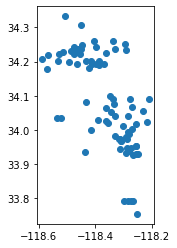

In [7]:
# plot gdf to see how cool it is that we converted to gdf from a csv file!!
gdf.plot()

In [8]:
# convert gdf to web mercator
gdf_wm = gdf.to_crs(epsg=3857)

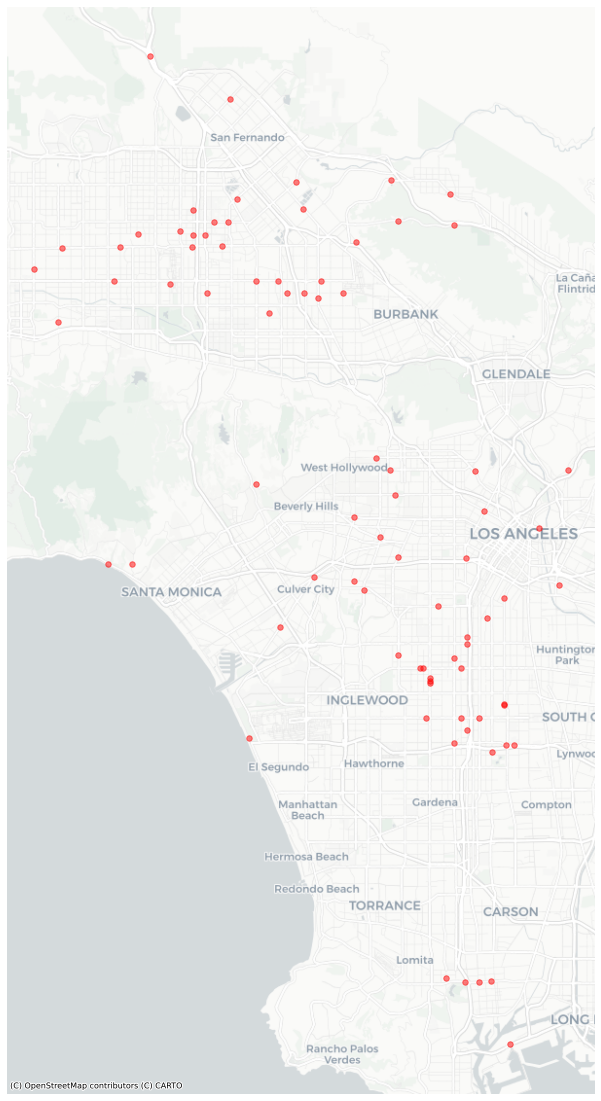

In [9]:
# map it!
fig,ax = plt.subplots(figsize=(20,20))

gdf_wm.plot(ax=ax,
             color='red',
             markersize=30, alpha=.5,)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)


# Step 3:
Add streetlight data to overlay onto above map

In [10]:
# import street light data
gdf_lights = gpd.read_file('Data/Street_Lights.geojson')

In [11]:
gdf_lights.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 218353 entries, 0 to 218352
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   OBJECTID  218353 non-null  int64   
 1   SLID      218353 non-null  int64   
 2   STLID     218353 non-null  object  
 3   STATUS    218353 non-null  object  
 4   LASTPLAN  218353 non-null  object  
 5   POSTDESC  218353 non-null  object  
 6   LAMPA     218353 non-null  object  
 7   LAMPB     218353 non-null  object  
 8   LAMPC     218353 non-null  object  
 9   LAMPD     218353 non-null  object  
 10  LAMPE     218353 non-null  object  
 11  LAMPF     218353 non-null  object  
 12  TOOLTIP   218353 non-null  object  
 13  NLA_URL   218353 non-null  object  
 14  geometry  218353 non-null  geometry
dtypes: geometry(1), int64(2), object(12)
memory usage: 25.0+ MB


In [12]:
gdf_lights.head()

,OBJECTID,SLID,STLID,STATUS,LASTPLAN,POSTDESC,LAMPA,LAMPB,LAMPC,LAMPD,LAMPE,LAMPF,TOOLTIP,NLA_URL,geometry
0,1,198740,SL5552-53,AsBuilt,SL7332,25' Ameron Rnd Conc Pole,55W LED,55W LED,,,,,Post: 25' Ameron Rnd Conc Pole,navigatela/reports/street_lights.cfm?PK=198740,POINT (-118.47791 33.99162)
1,2,198741,SL5552-54,AsBuilt,SL7332,25' Ameron Rnd Conc Pole,55W LED,55W LED,,,,,Post: 25' Ameron Rnd Conc Pole,navigatela/reports/street_lights.cfm?PK=198741,POINT (-118.47807 33.99180)
2,3,198742,SL5552-55,AsBuilt,SL7332,25' Ameron Rnd Conc Pole,55W LED,55W LED,,,,,Post: 25' Ameron Rnd Conc Pole,navigatela/reports/street_lights.cfm?PK=198742,POINT (-118.47820 33.99195)
3,4,198743,SL5552-56,AsBuilt,SL7332,25' Ameron Rnd Conc Pole,55W LED,55W LED,,,,,Post: 25' Ameron Rnd Conc Pole,navigatela/reports/street_lights.cfm?PK=198743,POINT (-118.47833 33.99210)
4,5,198744,SL5552-57,AsBuilt,SL7332,25' Ameron Rnd Conc Pole,55W LED,55W LED,,,,,Post: 25' Ameron Rnd Conc Pole,navigatela/reports/street_lights.cfm?PK=198744,POINT (-118.47849 33.99228)


In [13]:
# get the layers into a web mercator projection
# reproject to web mercator
gdf_lights = gdf_lights.to_crs(epsg=3857)

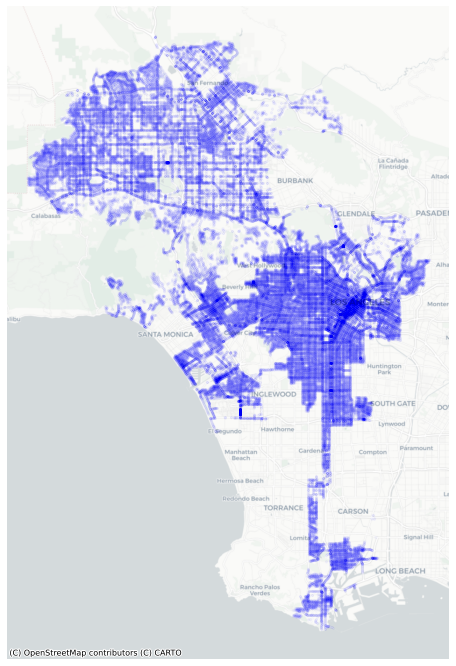

In [14]:
# map street lights
fig, ax = plt.subplots(figsize=(12,12))

gdf_lights.plot(ax=ax,
         color='blue', 
         markersize=5,
         alpha=0.01)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Step 4: 
Creating a two layer map

In [15]:
# first I'm going to get the bounding box coordinates for the location data
minx, miny, maxx, maxy = gdf_wm.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-13201210.576778045
-13159226.419693412
3995821.154989851
4073544.802768655


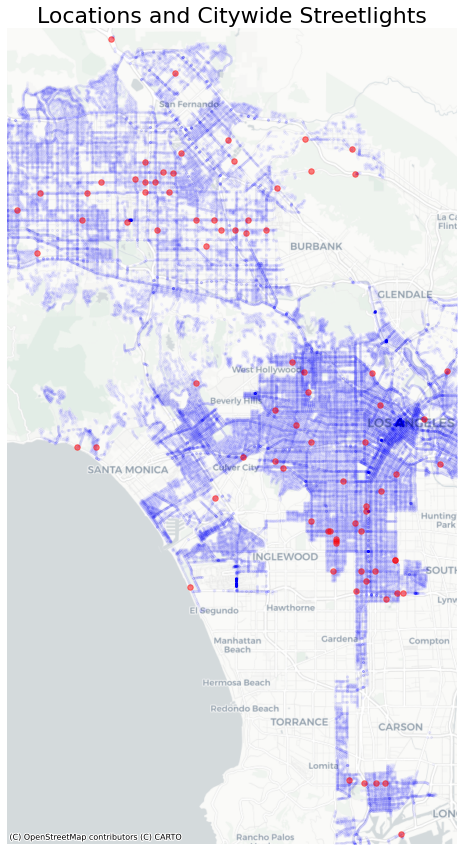

In [41]:
# now I'm going to set up a map with both data layers

# set up the plot canvas with plt.subplots
fig, ax = plt.subplots(figsize=(15, 15))

# street lights
gdf_lights.plot(ax=ax, # this puts it in the ax plot
        color='blue', 
        markersize=5,
        alpha=0.01)

# 80 locations
gdf_wm.plot(ax=ax, # this also puts it in the same ax plot
            color='red',
            markersize=30,
            alpha=0.5)

# use the bounding box coordinates to set the x and y limits
ax.set_xlim(minx - 1000, maxx + 1000) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - 1000, maxy + 1000)

# no axis
ax.axis('off')
ax.set_title('Locations and Citywide Streetlights',fontsize=22)
# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Step 5:
**Analysis:** This two layer map shows our location data in red, and streetlight data in blue. The darker blue areas represent places with many streetlights (since the alpha was set to .01, we can tell that the darker areas have more data points), and the lighter blue areas are where there are fewer street lights. From first glance it looks like our 80 locations are generally in places with lighter blue dots, meaning they might have fewer street lights than other areas. The next step will now be spatially joining streetlight data to our 80 locations.

## Step 6: 
Now I'm going to create a buffer around each collision location to capture the amount of street lights that fall within that buffer zone. Buffer is set to 30 meters (~100 feet)

In [17]:
# making a copy of my 80 collision locations df
gdf_wm_buffer = gdf_wm.copy()

In [18]:
# adding the buffer of 30 meters (100 feet) around each location
gdf_wm_buffer['geometry']=gdf_wm_buffer['geometry'].buffer(30)

<AxesSubplot:>

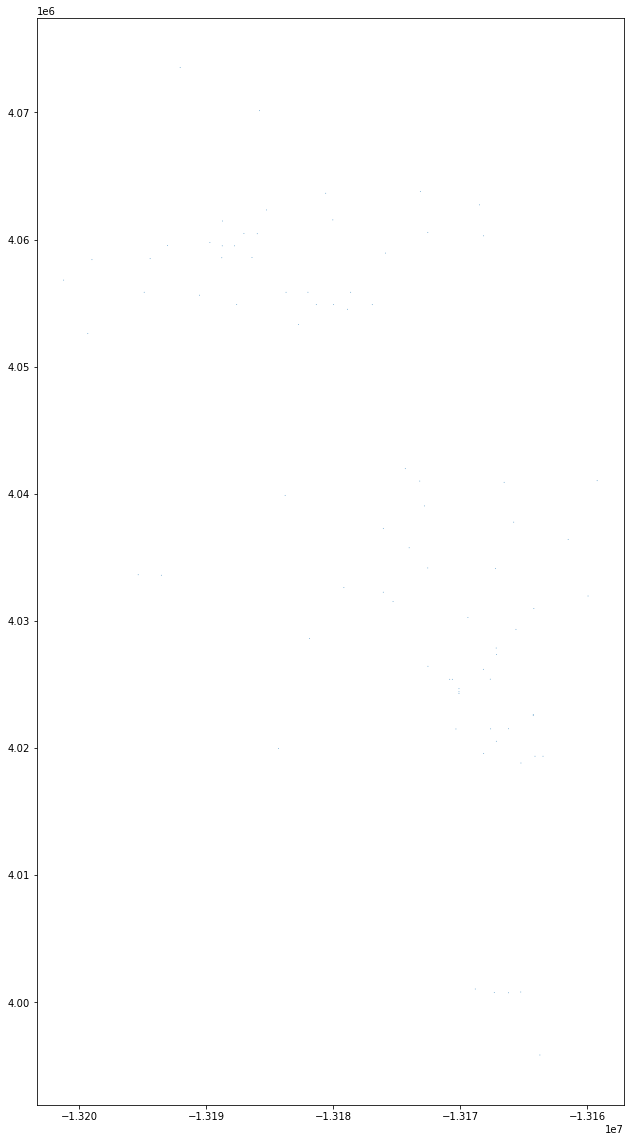

In [19]:
#plotting the buffer
gdf_wm_buffer.plot(figsize=(20,20))

## Step 7: 
Spatial join streetlights to 80 locations with the buffer 

In [20]:
# joining buffer data onto light data 
join = gpd.sjoin(gdf_wm_buffer, gdf_lights, how='left')
join.head()

,ID,Longitude,Latitude,Location,time_code,geometry,index_right,OBJECTID,SLID,STLID,...,LASTPLAN,POSTDESC,LAMPA,LAMPB,LAMPC,LAMPD,LAMPE,LAMPF,TOOLTIP,NLA_URL
0,184240,-118.466162,34.194008,"SEPULVEDA BLVD & VANOWEN ST, LOS ANGELES, CA",1,"POLYGON ((-13187562.852 4054882.387, -13187562...",76588.0,76589.0,176630.0,SL4464-74,...,LED9080,CD954,68W LED,,,,,,Post: CD954,navigatela/reports/street_lights.cfm?PK=176630
0,184240,-118.466162,34.194008,"SEPULVEDA BLVD & VANOWEN ST, LOS ANGELES, CA",1,"POLYGON ((-13187562.852 4054882.387, -13187562...",76587.0,76588.0,176632.0,SL4464-77,...,LED9080,CD953C,68W LED,,,,,,Post: CD953C,navigatela/reports/street_lights.cfm?PK=176632
0,184240,-118.466162,34.194008,"SEPULVEDA BLVD & VANOWEN ST, LOS ANGELES, CA",1,"POLYGON ((-13187562.852 4054882.387, -13187562...",76597.0,76598.0,171129.0,P34774-1,...,LED9080,Cal Type 26-4-70,88W LED,,,,,,Post: Cal Type 26-4-70,navigatela/reports/street_lights.cfm?PK=171129
0,184240,-118.466162,34.194008,"SEPULVEDA BLVD & VANOWEN ST, LOS ANGELES, CA",1,"POLYGON ((-13187562.852 4054882.387, -13187562...",76595.0,76596.0,176631.0,SL4464-75,...,LED9080,CD953C,88W LED,,,,,,Post: CD953C,navigatela/reports/street_lights.cfm?PK=176631
1,184324,-118.274077,33.945564,"CENTURY BLVD & MAIN ST, LOS ANGELES, CA",1,"POLYGON ((-13166179.970 4021494.978, -13166180...",196340.0,196341.0,138435.0,P25050-9,...,LED5092,CD953C7,136W LED,,,,,,Post: CD953C7,navigatela/reports/street_lights.cfm?PK=138435


In [21]:
# creating a dataframe that counts street lights that fall into each buffer zone 
lights_in_buffer = join.Location.value_counts().rename_axis('Location').reset_index(name='lights_count')
lights_in_buffer.head()

,Location,lights_count
0,"VINELAND AVE & VANOWEN ST, LOS ANGELES, CA",8
1,"ROSCOE BLVD & LINDLEY AVE, LOS ANGELES, CA",6
2,"CESAR E CHAVEZ AVE & VIGNES ST, LOS ANGELES, CA",6
3,"ROSCOE BLVD & WILLIS AVE, LOS ANGELES, CA",6
4,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",5


<AxesSubplot:xlabel='Location'>

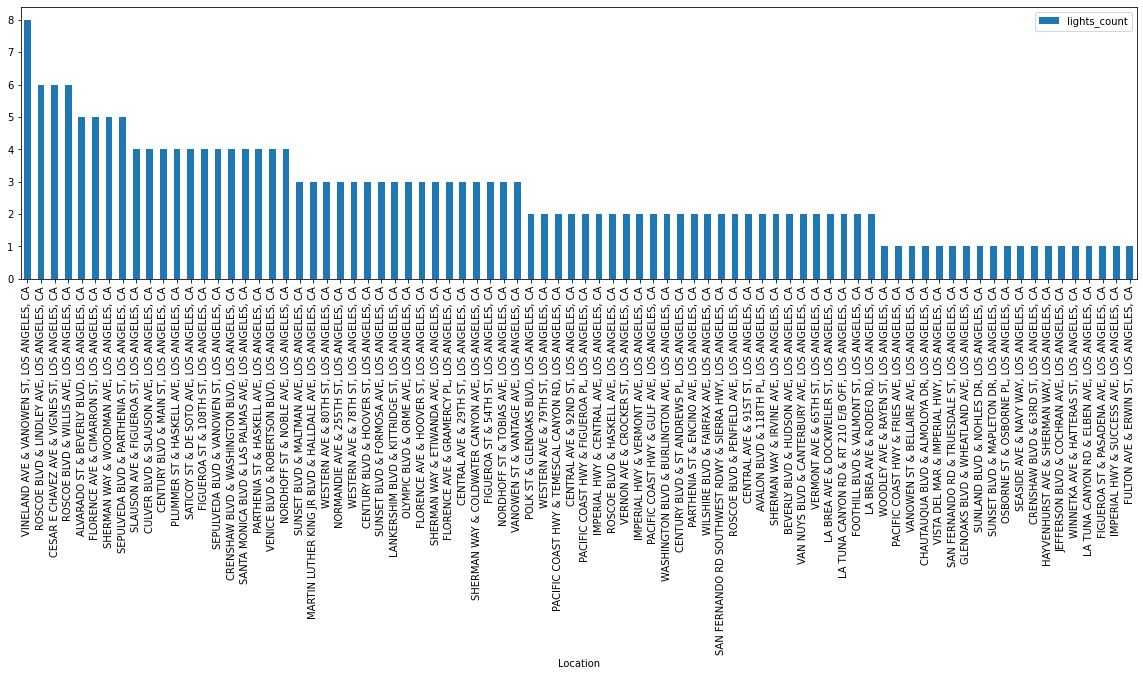

In [22]:
# creating a bar chart to see top 20 locations with most streetlights
lights_in_buffer.plot.bar(figsize=(20,5),
                               x='Location',
                               y='lights_count')

In [23]:
# obviously this is a hard to read, but it's somewhat nice to see a visual of all of the locations + counts

In [24]:
lights_in_buffer.describe()

,lights_count
count,82.000000
mean,2.634146
std,1.453070
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,8.000000


In [25]:
# ok so good to know that the mean number of streetlights per location is around >2

## Step 8:
Joining value counts back to gdf so I can map this 

In [26]:
gdf_wm_buffer=gdf.merge(lights_in_buffer,on='Location')
# now each of the 80 locations has their street light count attached
gdf_wm_buffer.head()

,ID,Longitude,Latitude,Location,time_code,geometry,lights_count
0,184240,-118.466162,34.194008,"SEPULVEDA BLVD & VANOWEN ST, LOS ANGELES, CA",1,POINT (-118.46616 34.19401),4
1,184324,-118.274077,33.945564,"CENTURY BLVD & MAIN ST, LOS ANGELES, CA",1,POINT (-118.27408 33.94556),4
2,184104,-118.291552,33.931004,"IMPERIAL HWY & VERMONT AVE, LOS ANGELES, CA",1,POINT (-118.29155 33.93100),2
3,97673,-118.476700,34.221359,"ROSCOE BLVD & HASKELL AVE, LOS ANGELES, CA",1,POINT (-118.47670 34.22136),2
4,184135,-118.397622,34.193943,"VANOWEN ST & VANTAGE AVE, LOS ANGELES, CA",1,POINT (-118.39762 34.19394),3


In [27]:
#write to file
gdf_wm_buffer.to_file("lights_buffer_timecode.geojson", driver='GeoJSON')

<AxesSubplot:>

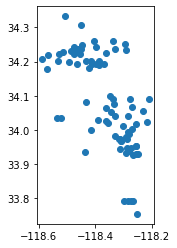

In [28]:
gdf_wm_buffer.plot() # ok cool we can plot this but it doesn't really tell us much, so I will make a another better map

## Step 9:
Plotting a choropleth map of 80 locations by number of streetlights in each 30 meter buffer zone.

In [29]:
# converting gdf to webmercator 
gdf_buffer = gdf_wm_buffer.to_crs(epsg=3857)

In [30]:
# plotting choropleth map of locations and streetlight counts

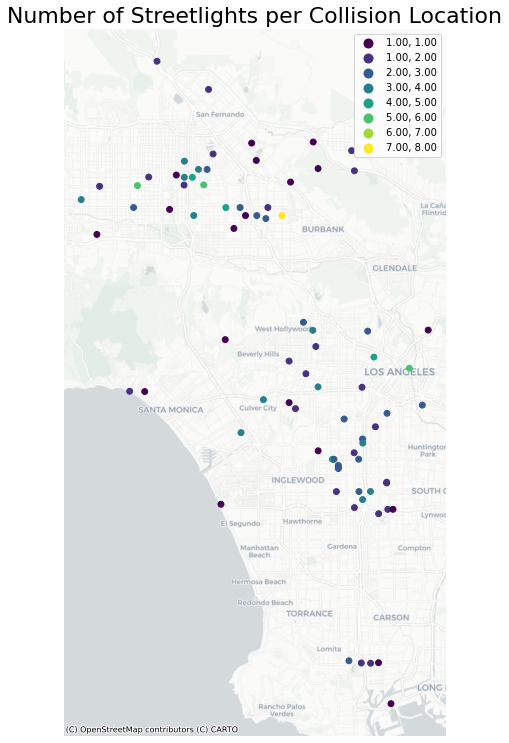

In [39]:
# plotting choropleth map of locations and streetlight counts
fig,ax = plt.subplots(figsize=(13,13))

gdf_buffer.plot(ax=ax,
        column='lights_count',
        legend=True,
        alpha=1,
        markersize=35,
        cmap='viridis',
        scheme='user_defined',
        classification_kwds={'bins':[1,2,3,4,5,6,7,8]})

ax.axis('off')
ax.set_title('Number of Streetlights per Collision Location',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Step 10: 
Now I'm interested in plotting the locations by their time codes

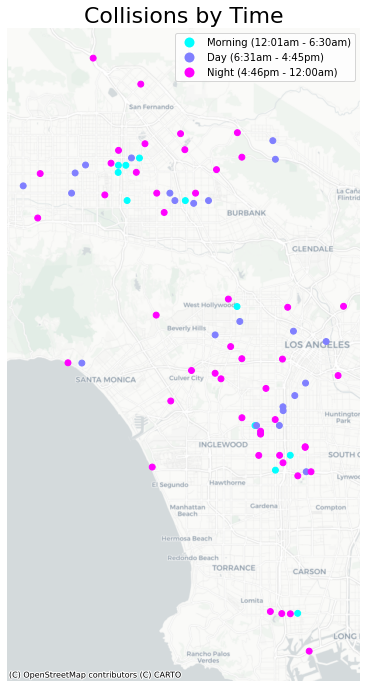

In [38]:
# plotting choropleth map of locations and the timing of the collisions
fig,ax = plt.subplots(figsize=(12,12))

gdf_buffer.plot(ax=ax,
        column='time_code',
        legend=True,
        alpha=1,
        markersize=35,
        cmap='cool',
        scheme='user_defined',
        classification_kwds={'bins':[1,2,3]})

ax.axis('off')
leg = ax.get_legend()
leg.get_texts()[0].set_text('Morning (12:01am - 6:30am)')
leg.get_texts()[1].set_text('Day (6:31am - 4:45pm)')
leg.get_texts()[2].set_text('Night (4:46pm - 12:00am)')
ax.set_title('Collisions by Time',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Step 11:
Now I want to see the average number of streetlights for each time category so will try to make a bar graph showing that....but I have actually no idea how to do that...

In [33]:
# getting the mean of each time code category
mean = gdf_buffer.groupby('time_code')['lights_count'].mean()

In [34]:
mean

time_code
1    3.250000
2    3.217391
3    2.191489
Name: lights_count, dtype: float64

In [35]:
mean_list = [['Morning', '3.25'], ['Day', '3.22'], ['Night', '2.19']]

In [36]:
# converting list to data frame
mean_df = pd.DataFrame (
    {"Mean Streetlights": [3.25, 3.22, 2.19]},
    index = ["Morning", "Day", "Night"])

mean_df

,Mean Streetlights
Morning,3.25
Day,3.22
Night,2.19


<AxesSubplot:>

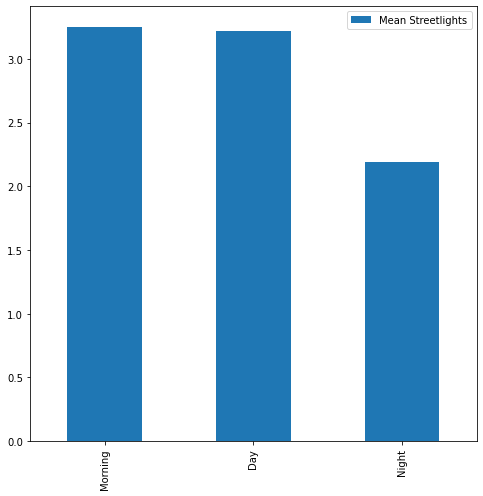

In [37]:
mean_df.plot.bar(figsize=(8,8), 
                               y='Mean Streetlights')

## Step 12:
Analysis: So now we can see that for the collisions that happened at night, the mean number of streetlights is lower than the number of crashes that happend during the morning and during the day. From the map in step 11 that mapped the number of collisions per time of day, we also see that highest number of crashes took place at night. 